In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyhyrec as pyhy

%matplotlib inline

In [2]:
# create a default cosmo params and injection params object
cosmo = pyhy.HyRecCosmoParams({'h' : 0.6766})
inj  = pyhy.HyRecInjectionParams()

z, xe, Tm, _ = pyhy.call_run_hyrec(cosmo(), inj())

The initial magnetic field comoving energy density is: 0.000000e+00
iz=0, z=8.000000e+03, pmf_en here is 0.000000e+00
iz=1, z=7.968060e+03, pmf_en here is 0.000000e+00
iz=2, z=7.936247e+03, pmf_en here is 0.000000e+00
iz=3, z=7.904562e+03, pmf_en here is 0.000000e+00
iz=4, z=7.873003e+03, pmf_en here is 0.000000e+00
iz=5, z=7.841570e+03, pmf_en here is 0.000000e+00
iz=6, z=7.810262e+03, pmf_en here is 0.000000e+00
iz=7, z=7.779079e+03, pmf_en here is 0.000000e+00
iz=8, z=7.748021e+03, pmf_en here is 0.000000e+00
iz=9, z=7.717087e+03, pmf_en here is 0.000000e+00
iz=10, z=7.686276e+03, pmf_en here is 0.000000e+00
iz=11, z=7.655589e+03, pmf_en here is 0.000000e+00
iz=12, z=7.625023e+03, pmf_en here is 0.000000e+00
iz=13, z=7.594580e+03, pmf_en here is 0.000000e+00
iz=14, z=7.564259e+03, pmf_en here is 0.000000e+00
iz=15, z=7.534058e+03, pmf_en here is 0.000000e+00
iz=16, z=7.503978e+03, pmf_en here is 0.000000e+00
iz=17, z=7.474018e+03, pmf_en here is 0.000000e+00
iz=18, z=7.444178e+03, p

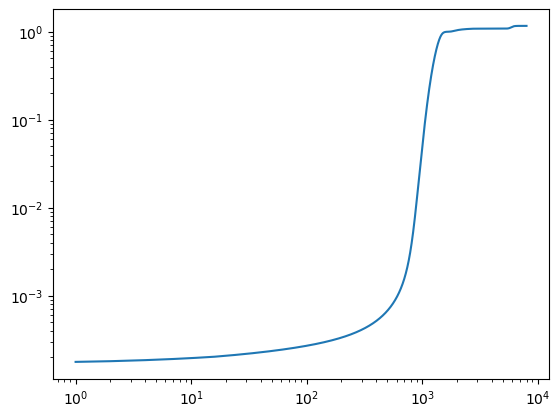

In [3]:
plt.loglog(z, xe)

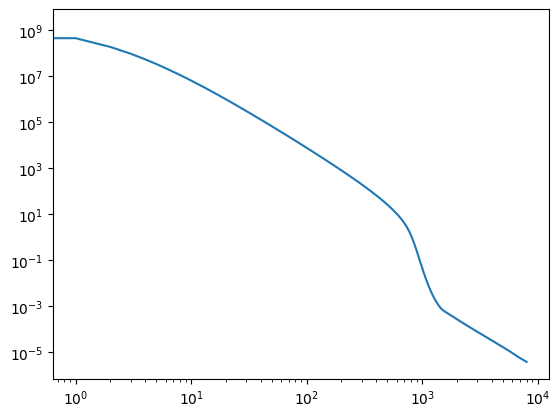

In [3]:
_MPC_TO_M_      = 3.08567758128e+22
_MSUN_TO_KG_    = 2.0e+30
_KG_TO_EV_      = 5.60958860380445e+35
_KM_TO_MPC_     = 1.0/_MPC_TO_M_ * 1e+3
_M_TO_MPC_     =  1.0/_MPC_TO_M_
_MASS_HYDROGEN_ = 0.93878299831e+9 # in eV
_MASS_PROTON_   = 0.938272e+9 # in eV
_MASS_HELIUM_   = 3.728400e+9 # in eV
_SIGMA_THOMSON_ = 6.6524616e-29 # in m^2
_C_LIGHT_       = 299792458 # in m / s

plt.loglog(1.0/(_SIGMA_THOMSON_ * xe * pyhy.n_baryons(cosmo)*(1+z)**3) * _M_TO_MPC_) # in Mpc

#plt.loglog(pyhy.hubble_rate(z) /_M_TO_MPC_ / _C_LIGHT_)

In [4]:
kd = pyhy.compute_acoustic_damping_scale(cosmo)

_MU_0_ = 4 * np.pi * 1e+19 / _KG_TO_EV_ # in m * nG^2 * s^2 / eV

vA = 1./np.sqrt(pyhy.rho_gamma(cosmo) * _MU_0_ * _C_LIGHT_**2 * 4/3)

print(kd)
print(vA)

kd/vA/(2*np.pi)


0.13726802150344267
0.0003770012619962514


57.949100846603294

In [5]:
z[np.argmin(np.abs(xe-0.12))]

from scipy import integrate

MPC_TO_M = 3.08567758128e+22
MSUN_TO_KG = 2.0e+30
KM_TO_MPC = 1/MPC_TO_M * 1e+3
MASS_PROTON = 1.67262192e-27 # in kg
MASS_HELIUM = 6.6464731e-27  # in kg
SIGMA_THOMSON = 6.6524587321e-29 # in m^2
C_LIGHT = 299792458 # in m / s


Nur  = cosmo.Neff - 0 # attention Nur here is important
Omr  = 4.48162687719e-7 * cosmo.T0**4 / cosmo.h**2 *( 1. + 0.227107317660239 * Nur)
Omnu = 0 # to be implemented

OmL = 1 - cosmo.Omega_cb - cosmo.Omega_k - Omr - Omnu

Ez = np.sqrt(OmL + cosmo.Omega_cb *(1+z)**3 +  cosmo.Omega_k * (1+z)**2 + Omr * (1+z)**4)

rho_b = 2.7754e+11 * cosmo.Omega_b * cosmo.h**2 * MSUN_TO_KG / MPC_TO_M**3 # in kg / m^3
n_b = rho_b / MASS_PROTON / (1 + cosmo.YHe / 4 * (MASS_HELIUM/MASS_PROTON -1)) # in 1/m^3

integral = np.array([integrate.trapezoid((1 + z[:iz])**2 / Ez[:iz] * xe[:iz], z[:iz]) for iz, _ in enumerate(z)])
pref = C_LIGHT * SIGMA_THOMSON * n_b / (100 * KM_TO_MPC * cosmo.h) # in 1/s

tau = pref * integral
dtau_dz = pref * (1 + z)**2 / Ez * xe

visibility = dtau_dz * np.exp(-tau)


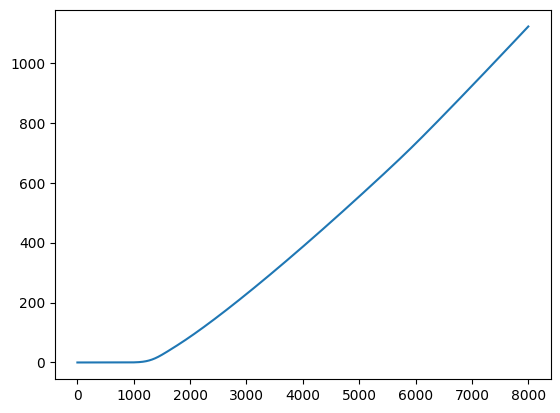

In [7]:
plt.plot(z, tau)
#z[np.argmax(visibility)]
#plt.xlim([500, 1300])

In [4]:
# create a cosmo params and injection params object with Primordial Black Holes
inj_pbh  = pyhy.HyRecInjectionParams({'fpbh' : 1.0, 'Mpbh': 1e+3})
z_pbh, xe_pbh, Tm_pbh = pyhy.call_run_hyrec(cosmo(), inj_pbh())

In [3]:
# turbulences
inj_pmf_1 = pyhy.HyRecInjectionParams({'sigmaB_PMF' : 1, 'nB_PMF': -1.5, 'smooth_z_PMF' : 1000.0, 'heat_channel_PMF' : 1})
z_pmf_1, xe_pmf_1, Tm_pmf_1, en_pmf_1 = pyhy.call_run_hyrec(cosmo(), inj_pmf_1())

The initial magnetic field comoving energy density is: 2.483418e-08
iz=0, z=8.000000e+03, pmf_en here is 2.483418e-08
iz=1, z=7.968060e+03, pmf_en here is 2.483418e-08
iz=2, z=7.936247e+03, pmf_en here is 2.483418e-08
iz=3, z=7.904562e+03, pmf_en here is 2.483418e-08
iz=4, z=7.873003e+03, pmf_en here is 2.483418e-08
iz=5, z=7.841570e+03, pmf_en here is 2.483418e-08
iz=6, z=7.810262e+03, pmf_en here is 2.483418e-08
iz=7, z=7.779079e+03, pmf_en here is 2.483418e-08
iz=8, z=7.748021e+03, pmf_en here is 2.483418e-08
iz=9, z=7.717087e+03, pmf_en here is 2.483418e-08
iz=10, z=7.686276e+03, pmf_en here is 2.483418e-08
iz=11, z=7.655589e+03, pmf_en here is 2.483418e-08
iz=12, z=7.625023e+03, pmf_en here is 2.483418e-08
iz=13, z=7.594580e+03, pmf_en here is 2.483418e-08
iz=14, z=7.564259e+03, pmf_en here is 2.483418e-08
iz=15, z=7.534058e+03, pmf_en here is 2.483418e-08
iz=16, z=7.503978e+03, pmf_en here is 2.483418e-08
iz=17, z=7.474018e+03, pmf_en here is 2.483418e-08
iz=18, z=7.444178e+03, p

In [4]:
#plt.plot(z_pmf_1, en_pmf_1)

for iz, z in enumerate(z_pmf_1):
    print(z, en_pmf_1[iz])

1.0 0.0
2.0 0.0
3.0 0.0
4.0 0.0
5.0 0.0
6.0 0.0
7.0 0.0
8.0 0.0
9.0 0.0
10.0 0.0
11.0 0.0
12.0 0.0
13.0 0.0
14.0 0.0
15.0 0.0
16.0 0.0
17.0 0.0
18.0 0.0
19.0 0.0
20.0 0.0
21.0 0.0
22.0 0.0
23.0 0.0
24.0 0.0
25.0 0.0
26.0 0.0
27.0 0.0
28.0 0.0
29.0 0.0
30.0 0.0
31.0 0.0
32.0 0.0
33.0 0.0
34.0 0.0
35.0 0.0
36.0 0.0
37.0 0.0
38.0 0.0
39.0 0.0
40.0 0.0
41.0 0.0
42.0 0.0
43.0 0.0
44.0 0.0
45.0 0.0
46.0 0.0
47.0 0.0
48.0 0.0
49.0 0.0
50.0 0.0
51.0 0.0
52.0 0.0
53.0 0.0
54.0 0.0
55.0 0.0
56.0 0.0
57.0 0.0
58.0 0.0
59.0 0.0
60.0 0.0
61.0 0.0
62.0 0.0
63.0 0.0
64.0 0.0
65.0 0.0
66.0 0.0
67.0 0.0
68.0 0.0
69.0 0.0
70.0 0.0
71.0 0.0
72.0 0.0
73.0 0.0
74.0 0.0
75.0 0.0
76.0 0.0
77.0 0.0
78.0 0.0
79.0 0.0
80.0 0.0
81.0 0.0
82.0 0.0
83.0 0.0
84.0 0.0
85.0 0.0
86.0 0.0
87.0 0.0
88.0 0.0
89.0 0.0
90.0 0.0
91.0 0.0
92.0 0.0
93.0 0.0
94.0 0.0
95.0 0.0
96.0 0.0
97.0 0.0
98.0 0.0
99.0 0.0
100.0 0.0
101.0 0.0
102.0 0.0
103.0 0.0
104.0 0.0
105.0 0.0
106.0 0.0
107.0 0.0
108.0 0.0
109.0 0.0
110.0 0.0
111.0 0.

In [4]:
# create a cosmo params and injection params object with Primordial Magnetic Fields

# turbulences
inj_pmf_1 = pyhy.HyRecInjectionParams({'sigmaB_PMF' : 1, 'nB_PMF': -1.5, 'smooth_z_PMF' : 1000.0, 'heat_channel_PMF' : 1})
z_pmf_1, xe_pmf_1, Tm_pmf_1, en_pmf = pyhy.call_run_hyrec(cosmo(), inj_pmf_1())

# ambipolar diffusion
inj_pmf_2 = pyhy.HyRecInjectionParams({'sigmaB_PMF' : 1, 'nB_PMF': -1.5, 'smooth_z_PMF' : 0.0, 'heat_channel_PMF' : 2})
z_pmf_2, xe_pmf_2, Tm_pmf_2, en_pmf = pyhy.call_run_hyrec(cosmo(), inj_pmf_2())

# ambipolar diffusion
inj_pmf_3 = pyhy.HyRecInjectionParams({'sigmaB_PMF' : 1, 'nB_PMF': -1.5, 'smooth_z_PMF' : 1000.0})
z_pmf_3, xe_pmf_3, Tm_pmf_3, en_pmf = pyhy.call_run_hyrec(cosmo(), inj_pmf_3())

In [27]:
# load data for comparisons to the precomputed default case
data = np.loadtxt("./tests/output_xe.dat")

z_c = np.flip(data[:, 0])
xe_c = np.flip(data[:, 1])
Tm_c = np.flip(data[:, 2])

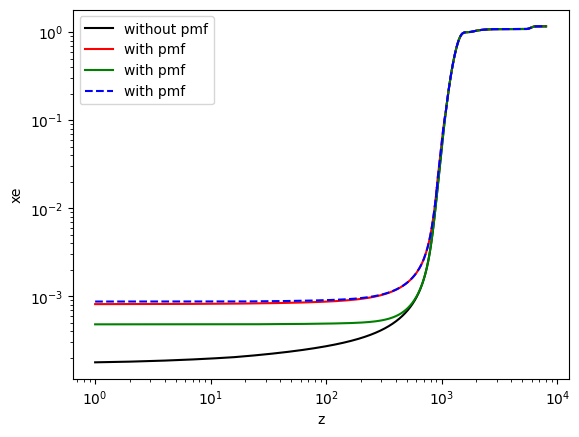

In [28]:
# plotting xe
fig = plt.figure()
ax = fig.gca()

ax.plot(z, xe, '-k', label='without pmf')
#ax.plot(z_pbh, xe_pbh, '-r', label='with pbh')
ax.plot(z_pmf_1, xe_pmf_1, '-r', label='with pmf')
ax.plot(z_pmf_2, xe_pmf_2, '-g', label='with pmf')
ax.plot(z_pmf_2, xe_pmf_3, '--b', label='with pmf')
#ax.plot(z_c, xe_c, 'c-.',  label='(default)')

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel('xe')
ax.set_xlabel('z')
ax.legend()

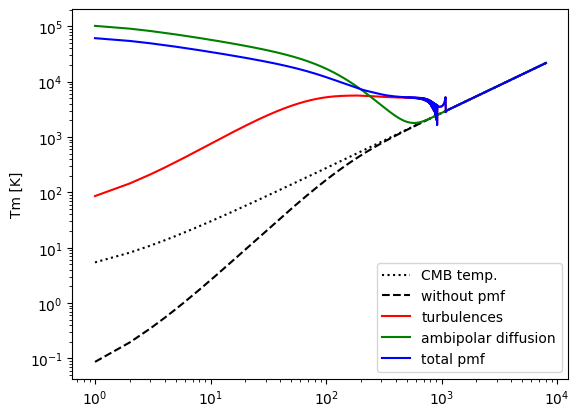

In [29]:
# plotting Tm
fig = plt.figure()
ax = fig.gca()

ax.plot(z, cosmo.T0 * (1+z), color='k', linestyle=':', label='CMB temp.')
ax.plot(z, Tm, 'k--', label='without pmf')
#ax.plot(z_pbh, Tm_pbh, '-r', label='with pbh')
ax.plot(z_pmf_1, Tm_pmf_1, '-r', label='turbulences')
ax.plot(z_pmf_2, Tm_pmf_2, '-g', label='ambipolar diffusion')
ax.plot(z_pmf_2, Tm_pmf_3, '-b', label='total pmf')
#ax.plot(z_c, Tm_c, 'c-.',  label='default')

#ax.plot(z_pmf, (1.0-np.tanh((z_pmf - 1088)/50.0))/2.0)


ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel('Tm [K]')
#ax.set_xlim(800, 1200)
#ax.set_xlabel('z')
ax.legend()

In [26]:
# create a cosmo params and injection params object with Primordial Magnetic Fields
inj_pmf = pyhy.HyRecInjectionParams({'sigmaB_PMF' : 0.01, 'nB_PMF': -2.9, 'smooth_z_PMF' : 0.0})

pyhy.call_dEdtdV_heat_turbulences_pmf(1000, 4.405114869327771e-14, cosmo(), inj_pmf())

1.5990393327835476e-13

In [30]:
pyhy.call_dEdtdV_heat_ambipolar_pmf(1000, 0.01, 1e+3, cosmo(), inj_pmf())

43.70358305777583